<a href="https://colab.research.google.com/github/JAIDHEER007/PIL-Python/blob/main/ContactSheet_W1_Assgn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coursera Pillow, Tesseract and OpenCV Week 1 assignment

Take an image. <br>
Edit the R, G, B channels with 0.1, 0.5, 0.9 intensities. <br>
This creates 9 different images. <br>
Now add the text "channel X intensity Y", where X represents the channel and Y reresents intensity. <br>
Use "fanwood-webfont.ttf" font for the text. <br>
The image and font file will be provided by them. <br>
Create a collage out of the 9 images created by the above steps. 

The Output should look something like this. <br><br>
<img src = 'https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/rD-3t2YEEemE8A7At5Cb6A_a3e65fa823b3fbecacd8170ccbf1ee4d_assignment1.png?expiry=1635724800000&hmac=QpmB9tNDQtQTXWXgUcubAtEGdPFJN1HM6XdSvpYcyUY'>

In [94]:
# Imports
import PIL
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

import urllib.request   # Used to get an Image, TTF from Internet
from IPython.display import display     # Used to display images in NoteBook

In [95]:
# Gathering the text file
# This step is not needed as the text file will be provided by Coursera
# fanwood-webfont seems to be deprecated
# So I am using someother font

fontUrl = 'https://github.com/ProgrammingFonts/ProgrammingFonts/raw/master/Droid-Sans-Mono/droid-sans-mono-1.00/Droid%20Sans%20Mono.ttf'
urllib.request.urlretrieve(fontUrl, 'myFont.ttf')

# This will create "myFont.ttf" file in the local filesystem
# "myFont.ttf" can be used further in the program

('myFont.ttf', <http.client.HTTPMessage at 0x7f969eb0a890>)

In [96]:
# This function will add a black strip under the image
# and adds font to the black strip

def addText(img, txt):
    newWidth = img.width
    newHeight = img.height + 60
    
    newImg = Image.new(mode = img.mode, size = (newWidth, newHeight))
    newImg.paste(im = img, box = (0, 0))
    
    # Adding Text
    # Replace "myFont.ttf" with "readonly/fanwood-webfont.ttf"
    # Change the size accordingly with the font
    customFont = ImageFont.truetype(font = 'myFont.ttf', size = 40) 
    newImgDraw = ImageDraw.Draw(newImg) 
    newImgDraw.text(xy = (10, img.height + 5), font = customFont, text = txt, fill = (255, 255, 255))
    
    return newImg

In [97]:
# Image.convert() method takes matrix argument
# That matrix argument can be either 4tuple or 12tuple object

# Here I am using 12 tuple format
# It is represented as

# newRed = 1 * oldRed + 0 * oldGreen + 0 * oldBlue + constant
# newRed = 0 * oldRed + 1 * oldGreen + 0 * oldBlue + constant
# newRed = 0 * oldRed + 0 * oldGreen + 1 * oldBlue + constant

# Based on the "channel" and "intensity" values 
# We will change the matrix

# mode will stay the same and it is RGB
def editChannel(img, channel, intensity):
    lst = [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
    lst[5 * channel] = intensity
    
    return img.convert(mode = img.mode, matrix = tuple(lst))

In [88]:
# Reading the image from Internet
# This step is not needed as the image file will be provided by Coursera

imageUrl = 'https://vetstreet.brightspotcdn.com/dims4/default/4f4dea1/2147483647/crop/0x0%2B0%2B0/resize/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2F31%2F1ba400a28511e087a80050568d634f%2Ffile%2FBengal-3-645mk062211.jpg'
urllib.request.urlretrieve(imageUrl, 'image.jpg')

# This will create "image.jpg" file in the local filesystem
# "image.jpg" can be used further in the program

('image.jpg', <http.client.HTTPMessage at 0x7f969eb06910>)

In [89]:
# Reading the image from file system 
# and converting it to RGB mode
# Replace "image.jpg" with "readonly/msi_recruitment.gif"

image=Image.open("image.jpg")
image=image.convert('RGB')

In [90]:
# Building a list of 9 edited images
# i ==> channel
# j => intensity

images = []
for i in range(3):
    for j in [0.1, 0.5, 0.9]:
        editedImage = addText(image, "channel {0} intensity {1}".format(i, j))
        images.append(editChannel(editedImage, i, j))

In [91]:
# Building a contact sheet

firstImage=images[0]
contactSheet=PIL.Image.new(firstImage.mode, (firstImage.width * 3, firstImage.height * 3))
x=0
y=0

for _image in images:
    contactSheet.paste(im = _image, box = (x, y))

    if x + firstImage.width == contactSheet.width:
        x = 0
        y += firstImage.height
    else:
        x += firstImage.width

In [92]:
# Resizing the contactSheet
contactSheet = contactSheet.resize((contactSheet.width // 2, contactSheet.height // 2))

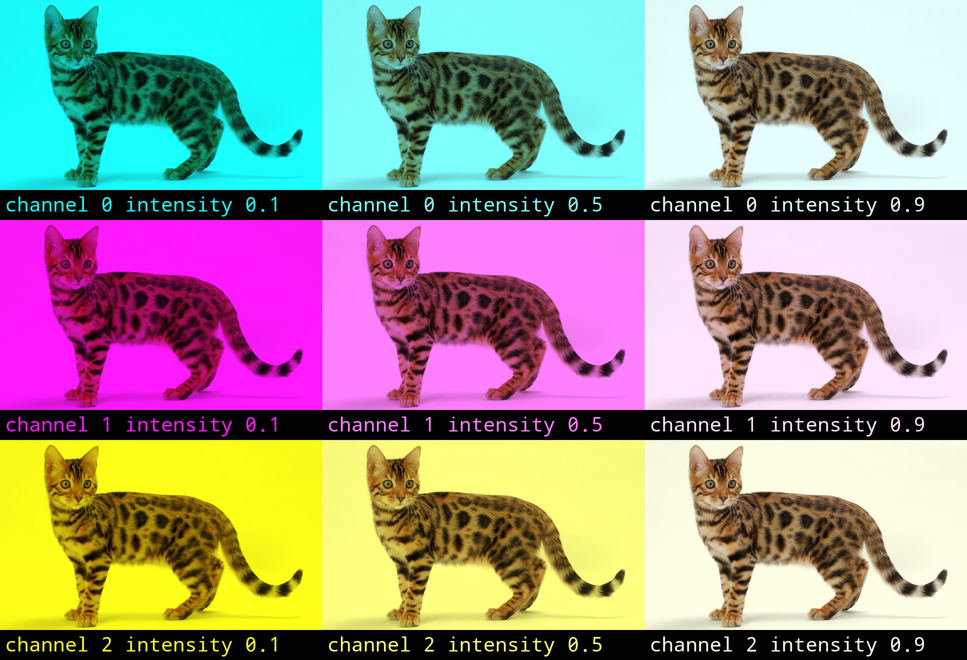

In [93]:
# Displaying the contactSheet
display(contactSheet)